# Load the Packages

In [54]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from joblib import dump  
import joblib 

In [2]:
# Adjusting the jupyter notebook display to see more data
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 500)

## Importing the data

In [13]:
#import the data
train = pd.read_csv("/home/jovyan/work/data/raw/train.csv")
test = pd.read_csv("/home/jovyan/work/data/raw/test.csv")

In [14]:
# observe the shape of the train data
train.shape

(8000, 21)

In [15]:
# observe the shape of the test data
test.shape

(3799, 20)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
Id             8000 non-null int64
GP             8000 non-null int64
MIN            8000 non-null float64
PTS            8000 non-null float64
FGM            8000 non-null float64
FGA            8000 non-null float64
FG%            8000 non-null float64
3P Made        8000 non-null float64
3PA            8000 non-null float64
3P%            8000 non-null float64
FTM            8000 non-null float64
FTA            8000 non-null float64
FT%            8000 non-null float64
OREB           8000 non-null float64
DREB           8000 non-null float64
REB            8000 non-null float64
AST            8000 non-null float64
STL            8000 non-null float64
BLK            8000 non-null float64
TOV            8000 non-null float64
TARGET_5Yrs    8000 non-null int64
dtypes: float64(18), int64(3)
memory usage: 1.3 MB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 20 columns):
Id         3799 non-null int64
GP         3799 non-null int64
MIN        3799 non-null float64
PTS        3799 non-null float64
FGM        3799 non-null float64
FGA        3799 non-null float64
FG%        3799 non-null float64
3P Made    3799 non-null float64
3PA        3799 non-null float64
3P%        3799 non-null float64
FTM        3799 non-null float64
FTA        3799 non-null float64
FT%        3799 non-null float64
OREB       3799 non-null float64
DREB       3799 non-null float64
REB        3799 non-null float64
AST        3799 non-null float64
STL        3799 non-null float64
BLK        3799 non-null float64
TOV        3799 non-null float64
dtypes: float64(18), int64(2)
memory usage: 593.7 KB


## **Data Glossary**

Id_old - Previous Player Identifier (apparently not in data)

Id - Player Identifier

GP - Games Played

MIN - Minutes Played

PTS - Points Per Game

FGM - Field Goals Made

FGA - Field Goals Attempts

FG% - Field Goals Percent

3P Made - 3-Points Made

3PA - 3-Points Attempts

3P% - 3-Points Percent

FTM - Free Throw Made

FTA - Free Throw Attempts

FT% - Free Throw Percent

OREB - Offensive Rebounds

DREB - Defensive Rebounds

REB - Rebounds

AST - Assists

STL - Steals

BLK - Blocks

TOV - Turnovers

TARGET_5Yrs - Outcome: 1 if career length >= 5 years, 0 otherwise


In [18]:
# identifying if there is any null values for each feature
test.isnull().sum()

Id         0
GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
dtype: int64

## Correlation Plot

Using the train dataset to check any association with the Target variable "TARGET_5Yrs" to the predictor variables.

In [19]:
# This is another Correlation plot I preferred this one as it does give a lot more information
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Id,1,0.0288605,0.0274807,0.0234165,0.0238453,0.0243408,0.00977674,0.00894692,0.00952366,-0.00555865,0.0208535,0.0174598,0.0188874,0.0140074,0.0181801,0.0184705,0.0177029,0.00797429,0.011955,0.021505,0.0182334
GP,0.0288605,1,0.60809,0.578344,0.577697,0.553374,0.27851,0.123231,0.119146,0.0454339,0.524276,0.519154,0.155667,0.402654,0.49207,0.484485,0.402126,0.473409,0.187269,0.537821,0.242108
MIN,0.0274807,0.60809,1,0.90484,0.895957,0.895085,0.234919,0.358597,0.372454,0.153846,0.767647,0.75366,0.212366,0.542782,0.770128,0.728842,0.639013,0.759933,0.260428,0.792059,0.182203
PTS,0.0234165,0.578344,0.90484,1,0.989208,0.973297,0.301991,0.337786,0.349452,0.156044,0.864463,0.842903,0.257157,0.539289,0.690687,0.673621,0.573893,0.678514,0.232923,0.816414,0.182004
FGM,0.0238453,0.577697,0.895957,0.989208,1,0.97267,0.34314,0.288906,0.2993,0.12323,0.810273,0.798366,0.208038,0.565086,0.699456,0.689229,0.550682,0.663419,0.245199,0.799119,0.183568
FGA,0.0243408,0.553374,0.895085,0.973297,0.97267,1,0.140998,0.373362,0.399025,0.20304,0.787989,0.761174,0.263515,0.464325,0.635072,0.60793,0.619597,0.689391,0.191895,0.81681,0.162389
FG%,0.00977674,0.27851,0.234919,0.301991,0.34314,0.140998,1,-0.269994,-0.330586,-0.312446,0.279252,0.335512,-0.1872,0.539317,0.429142,0.490902,-0.132006,0.0713637,0.288155,0.128622,0.158858
3P Made,0.00894692,0.123231,0.358597,0.337786,0.288906,0.373362,-0.269994,1,0.97934,0.58528,0.149567,0.0885163,0.320845,-0.200575,0.0766936,-0.0140976,0.375967,0.305817,-0.0947499,0.231413,0.0150164
3PA,0.00952366,0.119146,0.372454,0.349452,0.2993,0.399025,-0.330586,0.97934,1,0.576168,0.165116,0.101186,0.335011,-0.213506,0.0697817,-0.0232082,0.409646,0.337407,-0.101143,0.255422,0.00346266
3P%,-0.00555865,0.0454339,0.153846,0.156044,0.12323,0.20304,-0.312446,0.58528,0.576168,1,0.0130365,-0.0545167,0.339894,-0.297108,-0.10537,-0.181554,0.291623,0.195759,-0.169376,0.0951692,-0.0119766


TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

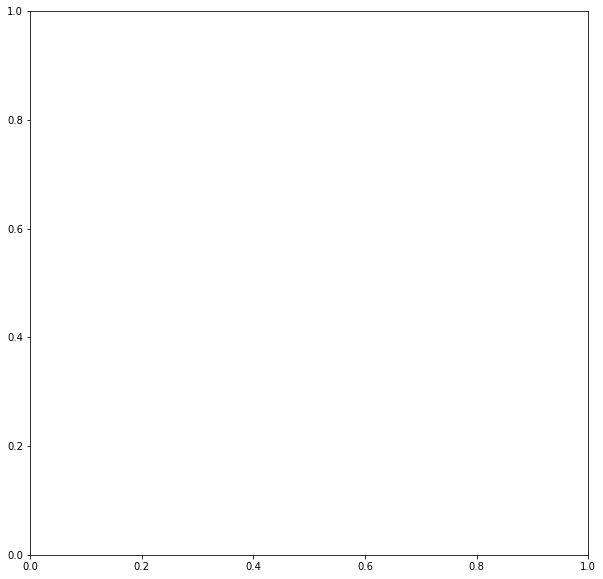

In [20]:
# Sample of using a correlation plot to identify which feature is associated with our Target variable "TARGET_5Yrs"
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 10))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)



## *Lets examine the details of the dataset* 

In [ ]:
# observing the first 5 records 
train.head()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,10556,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,2.0,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,5342,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,2.4,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,5716,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,0.4,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,13790,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,0.9,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,5470,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,0.2,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


In [ ]:
# the first 5 rows for test data
test.head()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,1,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,8194,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,-0.0,1.8
2,3,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,8196,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,8197,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9


Check the **TARGET_5Yrs** variable only has 0 or 1.

In [ ]:
# Check Target variable to see the unique values in that column, should be only 1 or 0
train["TARGET_5Yrs"].unique()

# Thats great there is no artifacts in that column besides 1 and 0

array([1, 0])

### Produce a crosstab to show the data imbalance for target variable

In [ ]:
# Using crosstab function lets check the train data of the sum of the group
pd.crosstab(train['TARGET_5Yrs'],train['TARGET_5Yrs'],margins=True)

TARGET_5Yrs,0,1,All
TARGET_5Yrs,,,
0,1331,0,1331
1,0,6669,6669
All,1331,6669,8000


From the crosstab above, in the train data we have an imbalanced dataset of 1331 NBA rookie players of whom do not make it to the NBA after 5 years. compared to 6669 NBA rookie players that do play on after 5 years with the NBA profession.<br>
This represents about 79% success rate of the 8000 players which adds to the issue that we have an **imbalanced dataset** that needs to be balanced out in order for make our models to be reliable and reasonably accurate as possible.


### *Summary statistics*

In [ ]:
# Summary statistics for train data
train.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,62.777875,18.576663,7.267087,2.807037,6.231213,44.608900,0.264525,0.816563,19.583700,1.392525,1.947787,71.365825,1.077838,2.168500,3.245300,1.624513,0.648688,0.245212,1.257762,0.833625
std,3977.447579,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,16.003155,0.926153,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,0.000000,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,0.700000,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,1.200000,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,1.900000,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,8.100000,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [ ]:
# Summary statistics for test data
test.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000
mean,7010.614109,62.853909,18.650224,7.328034,2.835404,6.302580,44.599079,0.255962,0.796920,19.234746,1.399842,1.953567,71.612924,1.096025,2.179495,3.275783,1.636483,0.653593,0.257726,1.257910
std,3954.173641,17.151740,8.727259,4.294724,1.688427,3.579221,6.040168,0.380987,1.052862,15.968989,0.926140,1.250376,10.457336,0.785678,1.371935,2.070646,1.335496,0.410573,0.639660,0.712449
min,1.000000,6.000000,3.700000,0.700000,0.300000,0.800000,25.100000,-1.000000,-2.700000,-38.000000,0.000000,0.000000,23.700000,0.000000,0.200000,0.300000,0.000000,0.000000,-7.100000,0.100000
25%,3644.000000,51.000000,12.200000,4.200000,1.600000,3.700000,40.500000,0.000000,0.100000,8.500000,0.700000,1.000000,65.000000,0.500000,1.200000,1.800000,0.600000,0.400000,0.100000,0.700000
50%,7062.000000,63.000000,17.000000,6.400000,2.500000,5.500000,44.600000,0.300000,0.800000,19.400000,1.200000,1.700000,71.500000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000
75%,10402.500000,74.000000,23.300000,9.400000,3.700000,8.100000,48.500000,0.500000,1.500000,30.250000,1.900000,2.600000,78.000000,1.500000,2.900000,4.300000,2.300000,0.900000,0.400000,1.600000
max,13792.000000,126.000000,68.000000,33.000000,13.400000,26.200000,74.600000,1.600000,4.300000,73.800000,7.800000,9.800000,127.100000,6.900000,12.000000,18.500000,9.000000,2.700000,14.800000,5.200000


### Preparing the data

In [ ]:
# Create a copy of the train data
df = train.copy()

# Seperate the TARGET_5YRS column from df and naming it as "target"
target = df.pop('TARGET_5Yrs')

In [ ]:
# review df 
df.head()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,10556,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,2.0,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6
1,5342,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,2.4,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4
2,5716,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,0.4,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6
3,13790,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,0.9,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9
4,5470,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,0.2,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7


# 6. *Logistic Regression Feature Importance*

These coefficients can provide the basis for a crude feature importance score. This assumes that the input variables have the same scale or have been scaled prior to fitting a model.


source: https://machinelearningmastery.com/calculate-feature-importance-with-python/


### *Note* GO TO FEATURE SELECTION 2 AS THIS WILL HAVE THE HIGHEST KAGGLE SCORE

In [21]:
# Create a copy of the train data
df = train.copy()

# Separate the TARGET_5YRS column from df and naming it as "target"
target = df.pop('TARGET_5Yrs')

In [22]:

X = df

y = target

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Feature: 0, Score: -0.00000
Feature: 1, Score: 0.02805
Feature: 2, Score: 0.01948
Feature: 3, Score: 0.01580
Feature: 4, Score: 0.00617
Feature: 5, Score: 0.00711
Feature: 6, Score: 0.00930
Feature: 7, Score: -0.00031
Feature: 8, Score: -0.00245
Feature: 9, Score: -0.00252
Feature: 10, Score: 0.00435
Feature: 11, Score: 0.00525
Feature: 12, Score: -0.01286
Feature: 13, Score: 0.00456
Feature: 14, Score: 0.00417
Feature: 15, Score: 0.00803
Feature: 16, Score: 0.00074
Feature: 17, Score: 0.00023
Feature: 18, Score: 0.00411
Feature: 19, Score: 0.00085


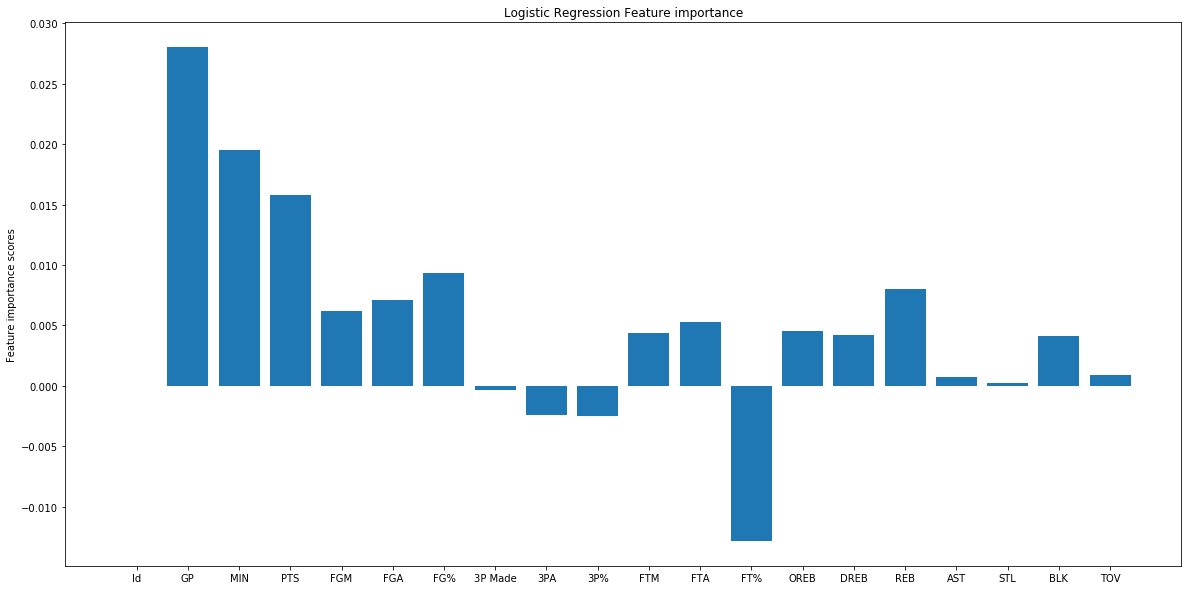

In [23]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


# define dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt_1 = pyplot.figure(figsize=(20, 10))
pyplot.bar([x for x in range(len(importance))], importance,tick_label=X.columns)
pyplot.title("Logistic Regression Feature importance")
pyplot.ylabel("Feature importance scores")
pyplot.show()

In [24]:
X.columns

Index(['Id', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV'], dtype='object')

In [25]:
# find feature number relating to which columns
for n in enumerate(df.columns):
    print(n)

(0, 'Id')
(1, 'GP')
(2, 'MIN')
(3, 'PTS')
(4, 'FGM')
(5, 'FGA')
(6, 'FG%')
(7, '3P Made')
(8, '3PA')
(9, '3P%')
(10, 'FTM')
(11, 'FTA')
(12, 'FT%')
(13, 'OREB')
(14, 'DREB')
(15, 'REB')
(16, 'AST')
(17, 'STL')
(18, 'BLK')
(19, 'TOV')


Seems the features **'3P Made', '3PA', '3P%'** and **'FT%'** is more associated in predicting players less than 5 years and should be likely to be excluded if to predict players that would survive a minimum 5 years in the NBA. 

### Creating the feature selection 

LETS USE ALL THESE 

In [26]:
# We select the features that are positive to see if these will improve the roc auc score for 
# the NBA rookie players predictions for at least 5 years.

# First selection feature
selected_features1 = ['Id','GP','MIN','FGM','FG%','3P Made','3P%','FTA','FT%','OREB','DREB','AST','BLK']


### *Preparing the data*

In [27]:
# Create a copy of the train data
df = train.copy()

# Seperate the TARGET_5YRS column from df and naming it as "target"
target = df.pop('TARGET_5Yrs')

In [44]:
# Save the prepared dataframe in the data / interim folder

df.to_csv('../data/interim/df.csv')


target.to_csv('../data/interim/training_target.csv')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [28]:
# saving the selected feature 1 as train_selection1

train_selection1 = train.loc[:,selected_features1]


### ***Scaling, train, test split and model creation for the feature selection 1 for Logistic Regression***

***Scaling the training data***

In [63]:
#Save standard scaler as scaler 
scaler = StandardScaler()

#  save it to models folder as scaler.joblib
dump(scaler, '../models/scaler.joblib')


['../models/scaler.joblib']

In [64]:
# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sel1 = scaler.fit_transform(train_selection1)

In [65]:
# Create train, test, split

Xsf1_train, Xsf1_test, ysf1_train, ysf1_test = train_test_split(X_sel1, y, test_size=0.2, random_state=42)

In [66]:
# save the different sets into processed folder
np.save('../data/processed/Xsf1_train', Xsf1_train)
np.save('../data/processed/Xsf1_test',  Xsf1_test)
np.save('../data/processed/ysf1_train', ysf1_train)
np.save('../data/processed/ysf1_test',  ysf1_test)

In [67]:
# logistic regression model
model_logreg = LogisticRegression(solver='saga') # saga has penalties like elasticnet, l1, l2 and none

# fit model
model_logreg.fit(Xsf1_train, ysf1_train)

# predict probabilities
pred_logreg = model_logreg.predict_proba(Xsf1_test)

In [68]:
#Save Logistic regression model as model_logreg 
model_logreg = LogisticRegression(solver='saga')

#  save it to models folder as model_logreg.joblib
dump(model_logreg, '../models/model_logreg.joblib')

['../models/model_logreg.joblib']

**Import roc auc score metric**

In [69]:
from sklearn.metrics import roc_auc_score
auc_score_logreg = roc_auc_score(ysf1_test, pred_logreg[:,1])

In [70]:
# auc roc score logistic regression with selected features 1
print(f' Logistic Regression for selected feature importance 1 is : {auc_score_logreg}')

 Logistic Regression for selected feature importance 1 is : 0.7116892424160555


### Apply the model to the  test dataset 
 - Remember to select the features first 
 - scale the data (Test dataset)
 - predict the probability using Logistic Regression model

### **Prepare the data for test dataset**

In [71]:
# make a copy of the test dataset as "test_data"
test_data =test.copy()

In [72]:
# Use the selected features as you done previously for the training data
test_selection1 = test_data.loc[:,selected_features1]


In [73]:
import os
os.getcwd()

'/home/jovyan/work/notebooks'

### *** Feature Selection 2: Scaling, train, test split and model creation for logistic regression***

***Preparing Data***

In [74]:
# load the df from interim folder and save it to 'df'
df = pd.read_csv('../data/interim/df.csv')

In [75]:
# load the target from train dataset from interim folder and save it to  "target"
target = pd.read_csv('../data/interim/training_target.csv')

***Creating feature selection***

In [76]:
# We select the features that are positive to see if these will improve the roc auc score for 
# the NBA rookie players predictions for at least 5 years.

# second selection feature

selected_features2 = ['GP','FGM','3P Made','OREB','DREB'] 


# selected_features2 = ['GP','MIN','PTS','3P Made','STL','AST']
# selected_features2 = ['GP','FGM','3P Made','OREB','DREB'] # BEST SCORE
# selected_features2 = ['GP','MIN','PTS','FG%','3P Made','STL','AST','TOV'] # kaggle scored" 0.70307
# selected_features2 = ['GP','MIN','PTS','FGA','FG%','REB','OREB'] # 7 features scored 0.70636
# selected_features2 = ['GP','MIN','FGM'] # No Good
# selected_features2 = ['Id','GP','MIN','PTS','FGA','FGM','FG%','REB','FTA','OREB'] # 10 features scored:  0.70443
# selected_features2 = ['GP','MIN','PTS','FGA','FGM','FG%','REB','FTA','OREB'] # 9 features  scored:  0.70612
# selected_features2 = ['DREB','BLK','GP','MIN','PTS','FGA','FGM','FG%','REB','FTA','OREB'] # 11 features scored: 0.70591
# selected_features2 = ['GP','MIN','PTS','FG%'] # kaggle scored 0.70339

In [77]:
train_selection2 = train.loc[:,selected_features2]
train_selection2

,GP,FGM,3P Made,OREB,DREB
0,80,3.0,0.1,2.2,2.0
1,75,4.2,-0.3,3.6,3.7
2,85,1.9,0.4,0.6,1.8
3,63,3.5,0.3,0.8,2.0
4,63,1.7,0.5,2.4,2.7
...,...,...,...,...,...
7995,32,0.7,-0.1,0.3,1.8
7996,54,0.7,0.1,1.0,1.1
7997,85,4.0,0.2,1.0,2.1
7998,39,1.0,-0.3,0.4,0.6


***Scaling the training data***

In [78]:
# Load the scaler model
scaler = joblib.load('../models/scaler.joblib')

In [79]:
# scale the data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
X_sel2 = scaler.fit_transform(train_selection2)

In [80]:
# train test split
Xsf2_train, Xsf2_test, ysf2_train, ysf2_test = train_test_split(X_sel2, y, test_size=0.2, random_state=42)

In [81]:
# logistic regression model
model_logreg2 = LogisticRegression(solver='liblinear')#'liblinear' 

# fit model
model_logreg2.fit(Xsf2_train, ysf2_train)

# predict probabilities
pred_logreg2 = model_logreg2.predict_proba(Xsf2_test)

In [82]:
from sklearn.metrics import roc_auc_score
auc_score_logreg2 = roc_auc_score(ysf2_test, pred_logreg2[:,1])

Save the roc_auc_score metrics using joblib and name it as "***roc_auc_score***" in the models folder

In [83]:
# save roc_auc_score to models folder as roc_auc_score.joblib
dump(roc_auc_score, '../models/roc_auc_score.joblib')

['../models/roc_auc_score.joblib']

Save the Logistic Regression model using joblib and name it as "***model_logreg2***" in the models folder

In [84]:
# save logistic regression with liblinear solver to models folder as model_logreg2.joblib
dump(model_logreg2, '../models/model_logreg2.joblib')

['../models/model_logreg2.joblib']

In [85]:
# auc roc score logistic regression with selected features 2
auc_score_logreg2

0.7093259695533102

***ROC AUC Scores reference for selected features***

0.7093259695533102 for selected features ['GP','FGM','3P Made','OREB','DREB']<br>
0.711289675824     for selected features ['GP','MIN','FGM']<br>
**0.7135235516777532 for selected features  ['GP','MIN','PTS','FGA','FGM','FG%','REB','FTA','OREB']<br>** 
0.7127955157537305 for selected features  ['Id','GP','MIN','PTS','FGA','FGM','FG%','REB','FTA','OREB']<br> 
0.7133898888323271 for selected features  ['DREB','BLK','GP','MIN','PTS','FGA','FGM','FG%','REB','FTA','OREB'] 

### Scaling the data (Test dataset)

In [86]:
# make a copy of the test dataset as "test_data"
test_data =test.copy()

In [87]:
# test_selection1 = test_data.loc[:,selected_features1]
test_selection2 = test_data.loc[:,selected_features2]
test_selection2

,GP,FGM,3P Made,OREB,DREB
0,56,1.6,0.1,1.2,0.8
1,43,3.7,0.6,0.5,0.9
2,82,4.9,0.5,1.3,3.3
3,86,6.8,0.5,1.5,3.2
4,58,1.6,0.5,0.2,0.6
...,...,...,...,...,...
3794,84,3.4,0.0,1.9,2.3
3795,49,2.9,-0.1,1.7,2.8
3796,53,0.8,-0.4,0.7,1.0
3797,89,5.4,0.5,1.5,4.0


***Scale the data for the feature selection 2***

In [88]:
# # scale the data
# from sklearn.preprocessing import StandardScaler

In [89]:
# Load the scaler model
scaler = joblib.load('../models/scaler.joblib')

In [90]:
test_sel2 = scaler.fit_transform(test_selection2)
test_sel2

array([[-0.3996569 , -0.73178554, -0.40941771,  0.13235493, -1.00564285],
       [-1.15769727,  0.51213917,  0.90313746, -0.75871205, -0.93274348],
       [ 1.11642385,  1.22295329,  0.64062642,  0.25965021,  0.81684136],
       ...,
       [-0.57458929, -1.20566161, -1.72197287, -0.50412149, -0.85984411],
       [ 1.52459944,  1.51912584,  0.64062642,  0.51424077,  1.32713693],
       [-0.4579677 , -1.02795809, -0.40941771, -0.50412149, -0.13085043]])

In [91]:
# After standard scaling the test_data we now do a prediction on it based on the model was tested. 
# In this case this is Logistic Regression model "model1" as the AUC-ROC score was better than KNN model.

logreg_sf2_pred = model_logreg2.predict_proba(test_sel2)

In [92]:
pd.DataFrame(logreg_sf2_pred[:,1])

,0
0,0.830813
1,0.732739
2,0.928965
3,0.948945
4,0.770167
...,...
3794,0.945038
3795,0.834492
3796,0.774739
3797,0.947125


### Create a dataframe to attach predicted results to the players id in the test dataset.

In [93]:
# We want the "Id" column only in test data
test.iloc[:,0]

0          1
1       8194
2          3
3       8196
4       8197
        ... 
3794    8175
3795    8176
3796    8178
3797    8181
3798    8183
Name: Id, Length: 3799, dtype: int64

In [94]:
#creating a dataframe combining test['Id'] and the results from the model
frames = [test.iloc[:,0], pd.DataFrame(logreg_sf2_pred[:,1])]
logreg_sf2_test_result = pd.concat(frames, axis=1)
logreg_sf2_test_result.columns = ['Id','TARGET_5Yrs']

logreg_sf2_test_result["TARGET_5Yrs"] = logreg_sf2_test_result["TARGET_5Yrs"].round(2)
logreg_sf2_test_result

,Id,TARGET_5Yrs
0,1,0.83
1,8194,0.73
2,3,0.93
3,8196,0.95
4,8197,0.77
...,...,...
3794,8175,0.95
3795,8176,0.83
3796,8178,0.77
3797,8181,0.95


Save to csv file as ***'group3_log_reg_sf2.csv'***

In [95]:
# save to csv
logreg_sf2_test_result.to_csv('../data/processed/group3_log_reg_sf2_6f.csv',index = False)


In [ ]:
# check current directory
import os
os.getcwd()

'/Users/justin_mah/Projects/adv_dsi_at_1/notebooks'